In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [2]:
hr = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [ ]:
x,y = hr.drop('left',axis=1),hr['left']
ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')

from sklearn.compose import ColumnTransformer, make_column_selector

col_trnf = ColumnTransformer([
                                ('OHE', ohe, make_column_selector(dtype_include=object))],
                              remainder='passthrough', verbose_feature_names_out=False)

col_trnf = col_trnf.set_output(transform='pandas')
x = col_trnf.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [ ]:
# ss = StandardScaler()
# x_trn_scl = ss.fit_transform(x_train)
# x_tst_scl = ss.transform(x_test)

In [12]:
from sklearn.metrics import precision_score

depths = [None, 3,4,5,6,7]
min_samples = [2,10,0.025,0.01,0.05,0.1]
min_leaf = [1,10,0.025,0.01,0.05,0.1]
scores = []
for d in tqdm(depths):
    for ms in min_samples:
        for ml in min_leaf:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d, min_samples_split=ms, min_samples_leaf=ml)
            dtc.fit(x_train, y_train)
            y_pred = dtc.predict(x_test)
            scores.append([d,ms,ml,precision_score(y_test, y_pred, pos_label=1)])

df_score = pd.DataFrame(scores, columns=['depth', 'min_sample_split', 'min_sample_leaf', 'precision'])
df_score.sort_values('precision', ascending=False)

100%|██████████| 6/6 [00:03<00:00,  1.57it/s]


,depth,min_sample_split,min_sample_leaf,precision
18,NaN,0.010,1.000,0.990070
12,NaN,0.025,1.000,0.990040
24,NaN,0.050,1.000,0.990040
198,7.0,0.010,1.000,0.986166
192,7.0,0.025,1.000,0.986125
...,...,...,...,...
50,3.0,0.025,0.025,0.862457
140,5.0,0.100,0.025,0.862457
104,4.0,0.100,0.025,0.862457
176,6.0,0.100,0.025,0.862457


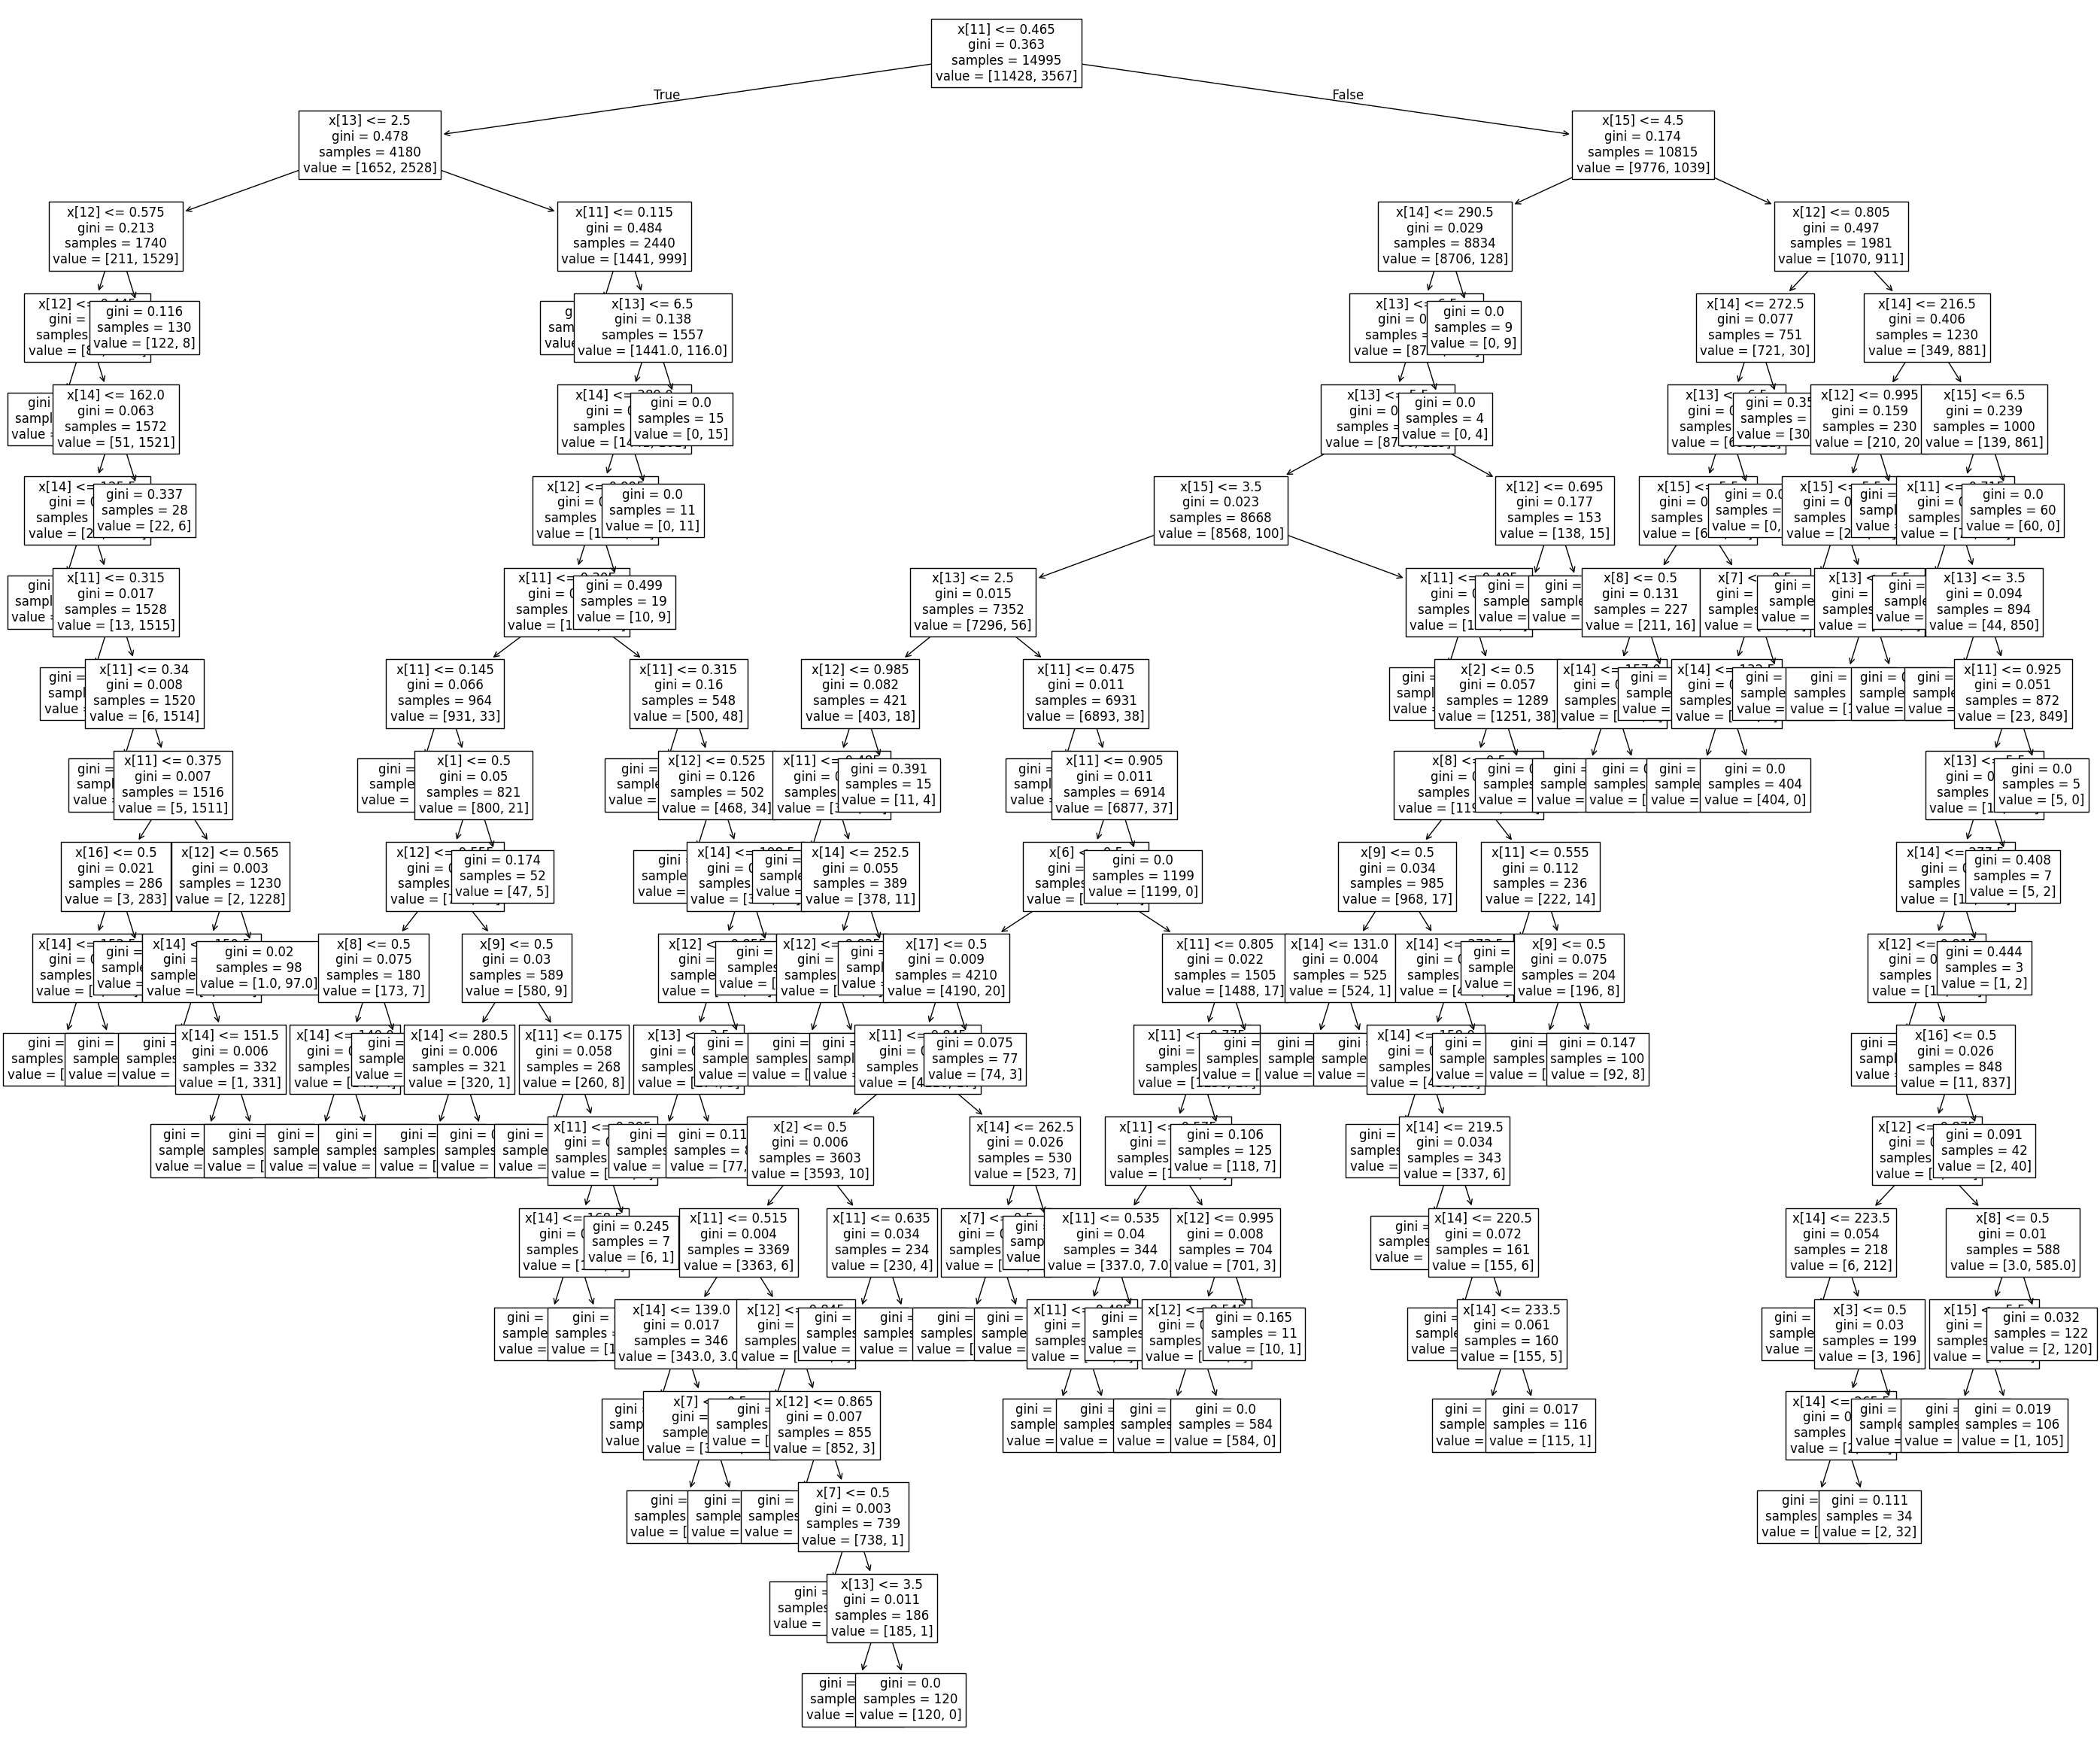

In [18]:
# Decision Tree plot

from sklearn.tree import plot_tree

best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_split=0.01, min_samples_leaf=1)
best_tree.fit(x, y)

plt.figure(figsize=(35,30))
plot_tree(best_tree, label='all', impurity=True, fontsize=12)
plt.show()

In [20]:
# Feature Importance Plot

best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_split=0.01, min_samples_leaf=1)
best_tree.fit(x, y)

df_imp = pd.DataFrame({'Feature': list(x.columns), 'Importance': best_tree.feature_importances_})
df_imp.sort_values('Importance', ascending=False)

,Feature,Importance
11,satisfaction_level,0.528496
15,time_spend_company,0.150631
12,last_evaluation,0.143533
13,number_project,0.107647
14,average_montly_hours,0.068409
8,Department_technical,0.000449
9,salary_low,0.000282
2,Department_hr,0.000178
7,Department_support,0.000125
1,Department_accounting,0.000112


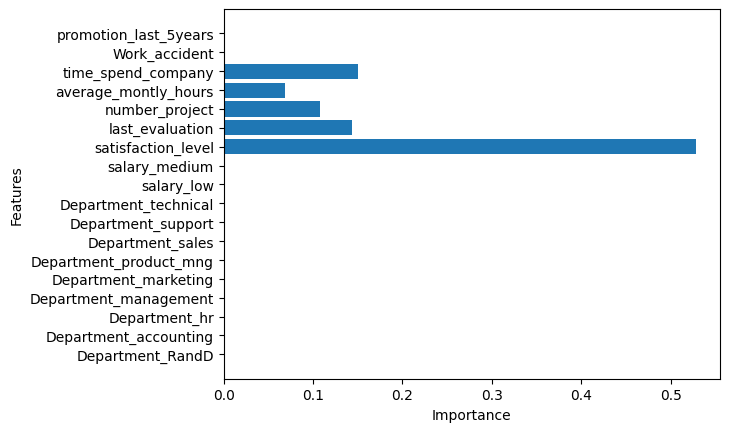

In [23]:
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Glass Identification